In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Clone Codes From Github

First of all, we clone official implementation of style GAN from Github.

In [ ]:
! git clone https://github.com/NVlabs/stylegan.git
import os
os.chdir("stylegan")

Cloning into 'stylegan'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), done.


In [ ]:
import os
import pprint
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

import tensorflow as tf

# Load Style GAN Model

Then we load the pre-trained networks. For generating images we use Gs model which its layers are printed below.

In [ ]:
tflib.init_tf()

# Load pre-trained network.
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

# Print network details.
Gs.print_layers()











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense

# Generate Images

Due to implementation limitations, we produce 100 images in two phases, each generating 50 images.

In [ ]:
images = []
for i in range(2):
    # Pick latent vector.
    rnd = np.random.RandomState(5 + i)
    latents = rnd.randn(50, Gs.input_shape[1])

    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images.append(Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt))

# Plot Generated Images

The images generated by style GAN can be observed below.

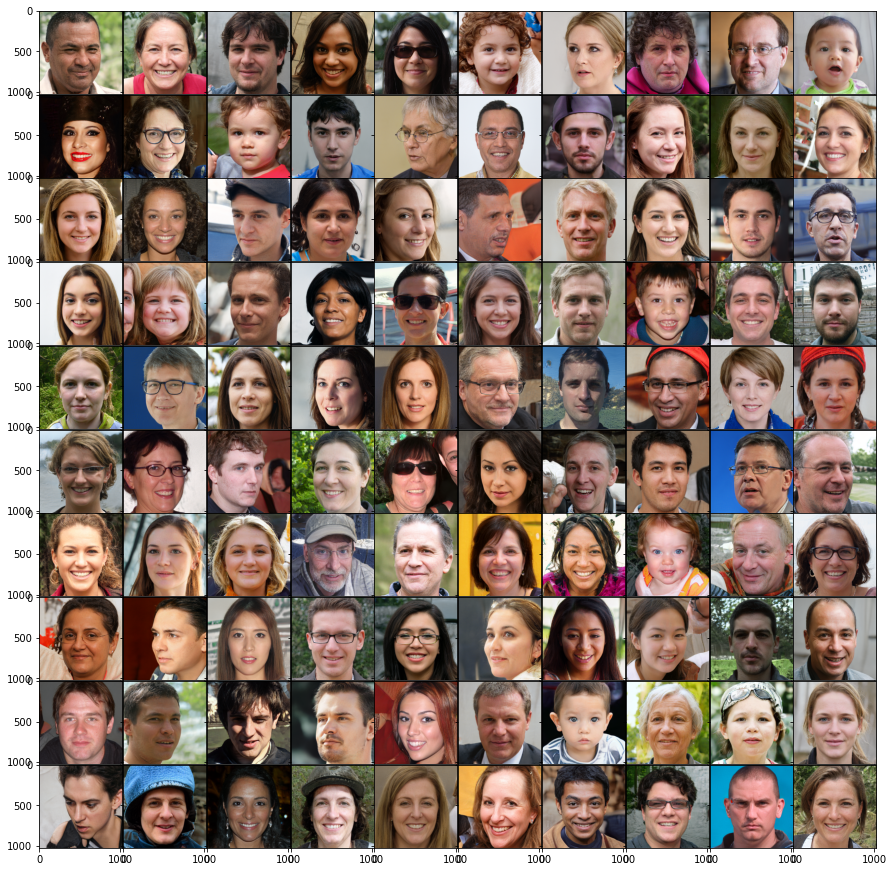

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(15, 18))
grid = ImageGrid(fig, 111, nrows_ncols=(10,10), axes_pad=0.01,)

for  j in range(2):
    for i in range(50):
        grid[j * 50 + i].imshow(images[j][i])